<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Boosting" data-toc-modified-id="Introduction-to-Boosting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Boosting</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Train-test-split-with-stratify" data-toc-modified-id="Train-test-split-with-stratify-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train test split with stratify</a></span></li><li><span><a href="#Train-Validation-with-stratify" data-toc-modified-id="Train-Validation-with-stratify-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train Validation with stratify</a></span></li><li><span><a href="#Modelling-xgboost-imbalanced-data" data-toc-modified-id="Modelling-xgboost-imbalanced-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modelling xgboost imbalanced data</a></span></li><li><span><a href="#Xgboost-modelling-Undersampled-data" data-toc-modified-id="Xgboost-modelling-Undersampled-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Xgboost modelling Undersampled data</a></span></li><li><span><a href="#Xgboost-modelling-Undersampled-data-with-n_estimators-=-150" data-toc-modified-id="Xgboost-modelling-Undersampled-data-with-n_estimators-=-150-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Xgboost modelling Undersampled data with n_estimators = 150</a></span></li><li><span><a href="#HPO-Hyper-Parameter-Optimization-using-hyperopt" data-toc-modified-id="HPO-Hyper-Parameter-Optimization-using-hyperopt-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>HPO Hyper Parameter Optimization using hyperopt</a></span></li><li><span><a href="#HPO-Notes" data-toc-modified-id="HPO-Notes-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO Notes</a></span></li><li><span><a href="#HPO-for-imbalanced-data" data-toc-modified-id="HPO-for-imbalanced-data-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>HPO for imbalanced data</a></span></li><li><span><a href="#HPO-Hyper-Parameter-Optimization-with-Optuna" data-toc-modified-id="HPO-Hyper-Parameter-Optimization-with-Optuna-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>HPO Hyper Parameter Optimization with Optuna</a></span></li><li><span><a href="#Threshold-Optimization" data-toc-modified-id="Threshold-Optimization-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Threshold Optimization</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Model-interpretation-using-eli5" data-toc-modified-id="Model-interpretation-using-eli5-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Model interpretation using eli5</a></span></li><li><span><a href="#Model-interpretation-using-shap" data-toc-modified-id="Model-interpretation-using-shap-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Model interpretation using shap</a></span></li></ul></li><li><span><a href="#Time-taken" data-toc-modified-id="Time-taken-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Time taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction to Boosting
References: 
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- http://xgboost.readthedocs.org/en/latest/parameter.html#general-parameters
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [1]:
import time

notebook_start_time = time.time()

# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bp")
import bp

import numpy as np
import pandas as pd

SEED = 0
RNG = np.random.RandomState(SEED)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams.update({'font.size': 16})
plt.style.use('ggplot')
%matplotlib inline

# mixed
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn scalar metrics
import sklearn.metrics as skmetrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# roc auc and curves
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# xgboost
import xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# six and pickle
import six
import pickle
import joblib

# hyperopt
import hyperopt
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample

# optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

# model evaluation
import shap
import lime
import eli5
from eli5.sklearn import PermutationImportance
import yellowbrick
import scikitplot

# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2021-08-08 

CPython 3.7.7
IPython 7.22.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

eli5        0.10.1
six         1.15.0
yellowbrick 1.1
hyperopt    0.2.3
shap        0.39.0
json        2.0.9
scikitplot  0.3.7
sklearn     0.23.1
xgboost     1.2.0
pandas      1.3.0
optuna      2.7.0
numpy       1.19.5
autopep8    1.5.2
joblib      1.0.1



The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


In [2]:
%load_ext autoreload
%autoreload 2

# Useful Scripts

In [3]:
df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F0.5':[],
                        'F1':[],
                        'F2':[],
                        'AUC':[],
                        'AUCPR':[],
                        'Time Taken': [],
                        'Time Taken Sec': [],
                    })

# Load the data

In [4]:
ifile = '../data/raw/creditcard.csv.zip'
df = pd.read_csv(ifile,compression='zip')
print(df.shape)
df.head()

(284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
target = 'Class'
df[target].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Train test split with stratify

In [6]:
from sklearn.model_selection import train_test_split

target = 'Class'
df_Xtrain_orig, df_Xtest, ser_ytrain_orig, ser_ytest = train_test_split(
    df.drop(target,axis=1), 
    df[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df[target])

ytrain_orig = ser_ytrain_orig.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

# Train Validation with stratify

In [7]:
df_Xtrain, df_Xvalid, ser_ytrain, ser_yvalid = train_test_split(
    df_Xtrain_orig, 
    ser_ytrain_orig,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig)

ytrain = ser_ytrain.to_numpy().ravel()
ytest = ser_ytest.to_numpy().ravel()

print(df_Xtrain.shape)
df_Xtrain.head()

(182276, 30)


Time        V1        V2        V3        V4        V5        V6  \
138257   82565.0  1.118591  0.562709  0.569628  2.987496 -0.365594 -0.531789   
60033    49125.0  1.170686  0.083759  0.466278  0.913911 -0.093123  0.427588   
31064    36195.0  1.072902 -0.015166  0.942251  1.330631 -0.580474  0.206235   
245706  152869.0  2.136909  0.088646 -2.490914  0.098321  0.789008 -1.399582   
25871    33805.0 -2.448378 -1.335508  1.240431  1.800068  0.383084 -0.501160   

              V7        V8        V9  ...       V20       V21       V22  \
138257 -0.044144  0.011932 -0.129131  ... -0.204184 -0.128269 -0.218875   
60033  -0.372727  0.312777  0.129610  ... -0.226078 -0.176121 -0.584726   
31064  -0.402121  0.313133  0.410088  ... -0.251464 -0.261720 -0.665725   
245706  0.854902 -0.492912 -0.254999  ... -0.266383  0.278034  0.934892   
25871   1.080410 -0.604093 -0.319458  ... -0.720572 -0.121319  0.625541   

             V23       V24       V25       V26       V27       V28  Amount  
138257 -0.048816  0.617265  0.551384  0.060220  0.016136  0.047100     7.6  
60033   0.066051 -0.746667  0.232641 -0.547740  0.038060  0.010995     3.9  
31064   0.167535  0.163815  0.192247 -0.620974  0.050609  0.019181     9.9  
245706 -0.211839 -0.234266  0.609699  1.020898 -0.154427 -0.112532     2.0  
25871  -0.639100  0.522532 -0.073801 -0.162788  0.294912 -0.211222   411.1  

[5 rows x 30 columns]

In [8]:
# random undersampling
n = df[target].value_counts().values[-1]
df_under = (df.groupby(target)
                .apply(lambda x: x.sample(n,random_state=SEED))
                .reset_index(drop=True))

df_Xtrain_orig_under, df_Xtest_under, ser_ytrain_orig_under, ser_ytest_under = train_test_split(
    df_under.drop(target,axis=1),
    df_under[target],
    test_size=0.2, 
    random_state=SEED, 
    stratify=df_under[target])

df_Xtrain_under, df_Xvalid_under, ser_ytrain_under, ser_yvalid_under = train_test_split(
    df_Xtrain_orig_under,
    ser_ytrain_orig_under,
    test_size=0.2, 
    random_state=SEED, 
    stratify=ser_ytrain_orig_under)

ser_ytrain.value_counts(), ser_ytest.value_counts(), ser_yvalid.value_counts()

(0    181961
 1       315
 Name: Class, dtype: int64,
 0    56864
 1       98
 Name: Class, dtype: int64,
 0    45490
 1       79
 Name: Class, dtype: int64)

# Modelling xgboost imbalanced data
```python
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```


[early stopping xgboost official note](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  


If early stopping occurs, the model will have three additional fields: bst.best_score, bst.best_iteration and bst.best_ntree_limit.
 Note that xgboost.train() will return a model from the last iteration, not the best one.
[Example](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)
```python
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
        eval_set=[(X_test, y_test)])

```

In [9]:
# help(XGBClassifier)

In [10]:
def get_row_eval(model,desc,df_eval,
                 df_Xtrain,ser_ytrain,df_Xtest,
                 kw_fit={},
                 sort='F2',
                 show=True):
    from sklearn import metrics as skmetrics
    
    time_start = time.time()
    model.fit(df_Xtrain, ser_ytrain,**kw_fit)
    ypreds = model.predict(df_Xtest)

    yprobs1d = model.predict_proba(df_Xtest)[:,1] # take second column
    ytx = np.array(ser_ytest).flatten()
    average = 'binary'

    time_taken_sec = time.time() - time_start
    m,s = divmod(time_taken_sec,60)
    time_taken = f"{s:.2f} sec" if not m else f"{m} min {s:.2f} sec"

    prec,rec,thr = sklearn.metrics.precision_recall_curve(ytest,yprobs1d)
    auc_pr = sklearn.metrics.auc(rec,prec)

    row_eval = ['Xgboost',desc, 
                skmetrics.accuracy_score(ytx, ypreds),
                skmetrics.precision_score(ytx, ypreds, average=average,zero_division=0),
                skmetrics.recall_score(ytx, ypreds, average=average,zero_division=0),
                skmetrics.fbeta_score(ytx, ypreds, average=average,beta=0.5,zero_division=0),
                skmetrics.f1_score(ytx, ypreds, average=average,zero_division=0),
                skmetrics.fbeta_score(ytx, ypreds, average=average,beta=2,zero_division=0),
                skmetrics.roc_auc_score(ytx, yprobs1d), # for auc, we need probs
                auc_pr,
                time_taken,
                time_taken_sec
               ]
    
    df_eval.loc[len(df_eval)] = row_eval
    df_eval = df_eval.drop_duplicates(subset=['Model','Description'])
    df_eval = df_eval.sort_values(sort,ascending=False)

    if show:
        # confusion matrix
        print(skmetrics.confusion_matrix(np.array(ser_ytest), ypreds))
        print(skmetrics.classification_report(np.array(ser_ytest),ypreds))

        # feature importance
        fig,ax = plt.subplots(figsize=(12,8))
        xgb.plot_importance(model,ax=ax)
        plt.show()

    return df_eval,ypreds,yprobs1d

[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



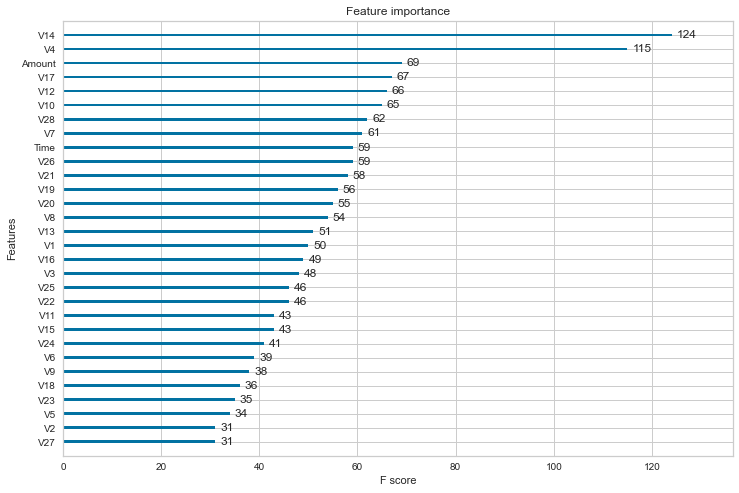

Model Description  Accuracy  Precision    Recall     F0.5       F1  \
0  Xgboost     default  0.999508   0.960526  0.744898  0.90796  0.83908   

         F2       AUC     AUCPR        Time Taken  Time Taken Sec  
0  0.779915  0.979969  0.836883  2.0 min 6.70 sec      126.698725

CPU times: user 1min 34s, sys: 1.18 s, total: 1min 36s
Wall time: 2min 7s


In [11]:
%%time

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED)
# model = XGBClassifier(n_jobs=-1, random_state=SEED,objective='binary:logistic')


desc = 'default'
df_eval,ypreds,yprobs1d = get_row_eval(model,desc,df_eval,
                               df_Xtrain_orig,ser_ytrain_orig,df_Xtest)

display(df_eval)

[[56858     6]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



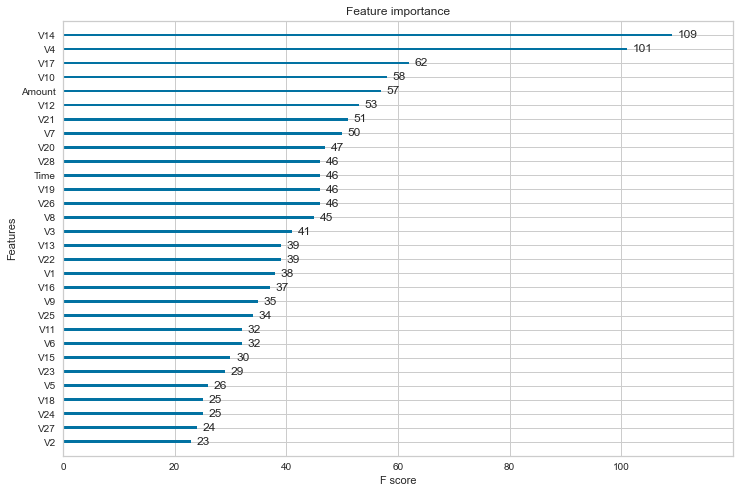

Model Description  Accuracy  Precision    Recall      F0.5        F1  \
1  Xgboost    early=30  0.999491   0.925926  0.765306  0.888626  0.837989   
0  Xgboost     default  0.999508   0.960526  0.744898  0.907960  0.839080   

         F2       AUC     AUCPR        Time Taken  Time Taken Sec  
1  0.792812  0.972040  0.822719  1.0 min 5.95 sec       65.950855  
0  0.779915  0.979969  0.836883  2.0 min 6.70 sec      126.698725

[[56858     6]
 [   23    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

CPU times: user 59.4 s, sys: 637 ms, total: 1min
Wall time: 1min 6s


In [12]:
%%time

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()


# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

kw_fit = dict(eval_set=[(df_Xvalid,ser_yvalid)],
            eval_metric='auc',
            verbose=0,
            early_stopping_rounds=30,
            )


desc = 'early=30'
df_eval,ypreds,yprobs1d = get_row_eval(model,desc,df_eval,
                    df_Xtrain_orig,ser_ytrain_orig,df_Xtest,kw_fit=kw_fit)

display(df_eval)

# confusion matrix
print(confusion_matrix(np.array(ser_ytest), ypreds))
print(classification_report(np.array(ser_ytest),ypreds))

# Xgboost modelling Undersampled data

[[54421  2443]
 [    4    94]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.96      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.96      0.52     56962
weighted avg       1.00      0.96      0.98     56962



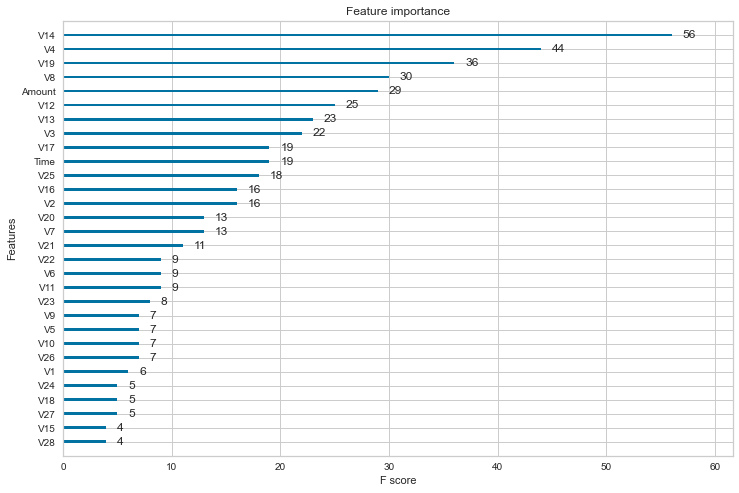

Model             Description  Accuracy  Precision    Recall      F0.5  \
1  Xgboost                early=30  0.999491   0.925926  0.765306  0.888626   
0  Xgboost                 default  0.999508   0.960526  0.744898  0.907960   
2  Xgboost  default, undersampling  0.957042   0.037052  0.959184  0.045872   

         F1        F2       AUC     AUCPR        Time Taken  Time Taken Sec  
1  0.837989  0.792812  0.972040  0.822719  1.0 min 5.95 sec       65.950855  
0  0.839080  0.779915  0.979969  0.836883  2.0 min 6.70 sec      126.698725  
2  0.071347  0.160464  0.986483  0.761076          0.40 sec        0.402027

[[54421  2443]
 [    4    94]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.96      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.96      0.52     56962
weighted avg       1.00      0.96      0.98     56962

CPU times: user 879 ms, sys: 43 ms, total: 922 ms
Wall time: 933 ms


In [13]:
%%time

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameter
Xtr = df_Xtrain_under
ytr = ser_ytrain_under
Xtx = df_Xtest
ytx = ser_ytest

Xvd = df_Xvalid
yvd = ser_yvalid


# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic')

kw_fit = {}
desc = 'default, undersampling'
df_eval,ypreds,yprobs1d = get_row_eval(model,desc,df_eval,
                Xtr,ytr,Xtx,kw_fit=kw_fit)

display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# Xgboost modelling Undersampled data with n_estimators = 150

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150)

model.fit(df_Xtrain_under, ser_ytrain_under)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[56860     4]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



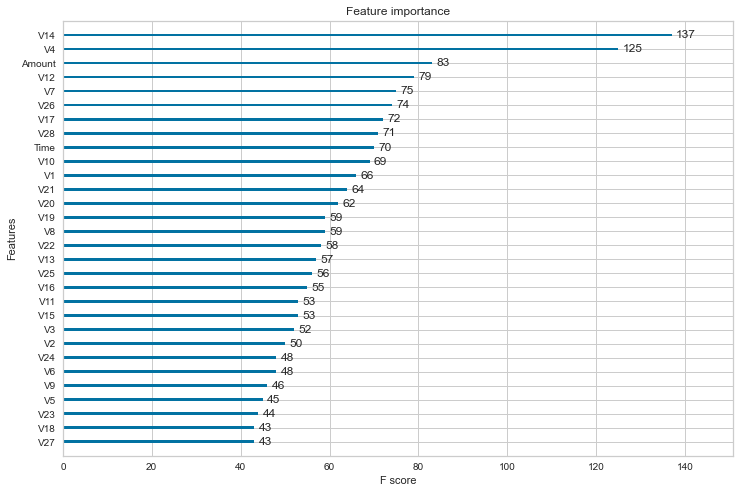

Model                   Description  Accuracy  Precision    Recall  \
1  Xgboost                      early=30  0.999491   0.925926  0.765306   
3  Xgboost  n_estimators=150, imbalanced  0.999508   0.948718  0.755102   
0  Xgboost                       default  0.999508   0.960526  0.744898   
2  Xgboost        default, undersampling  0.957042   0.037052  0.959184   

       F0.5        F1        F2       AUC     AUCPR        Time Taken  \
1  0.888626  0.837989  0.792812  0.972040  0.822719  1.0 min 5.95 sec   
3  0.902439  0.840909  0.787234  0.980479  0.839257  2.0 min 8.88 sec   
0  0.907960  0.839080  0.779915  0.979969  0.836883  2.0 min 6.70 sec   
2  0.045872  0.071347  0.160464  0.986483  0.761076          0.40 sec   

   Time Taken Sec  
1       65.950855  
3      128.879098  
0      126.698725  
2        0.402027

[[56860     4]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

CPU times: user 1min 56s, sys: 1.14 s, total: 1min 57s
Wall time: 2min 9s


In [15]:
%%time

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score,  precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix

time_start = time.time()

# current parameters
Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig
Xtx = df_Xtest
ytx = ser_ytest
Xvd = df_Xvalid
yvd = ser_yvalid

# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150)

kw_fit = {}
desc = 'n_estimators=150, imbalanced'
df_eval,ypreds,yprobs1d = get_row_eval(model,desc,
            df_eval,Xtr,ytr,Xtx,kw_fit=kw_fit)

display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# HPO Hyper Parameter Optimization using hyperopt

**Important Parameters**:

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.


**Regularization parameters**:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [16]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, STATUS_FAIL
from hyperopt.pyll import scope
from hyperopt.pyll.stochastic import sample
import copy
import pprint
pp = pprint.PrettyPrinter(indent=4)

def hpo_hyperopt(param_space, Xtrain, ytrain, Xtest, ytest, num_eval,cv=3):
    """HPO using hyperopt package.

    Hyper Parameter Optimation using Bayesian methods.

    Usage:
    -------
    num_eval = 500 # number of evaluations
    param_hyperopt = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 1000, 50)),
    'num_leaves': scope.int(hp.quniform('num_leaves', 5, 50, 1)),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    }


    trials, dict_best_params1 = hpo_hyperopt(param_hyperopt,
                                Xtrain_under, ytrain_under,
                                Xtest_under, ytest_under, num_eval)

    model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        **dict_best_params1)

    """
    # time
    time_start = time.time()
    
    # define objective function
    def objective_function(params):
        model = xgb.XGBClassifier(**params)
        score = cross_val_score(model, Xtrain, ytrain, cv=cv).mean()
        return {'loss': -score, 'status': STATUS_OK}

    # keep track of trials
    trials = Trials()

    # best params
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials,
                      rstate= np.random.RandomState(SEED))
    
    # dict best params
    dict_best_params = copy.copy(best_param)

    if 'boosting_type' in dict_best_params: 
        dict_best_params['boosting_type'] = 'gbdt' if dict_best_params['boosting_type'] == 0 else 'dart'


    int_params = ['max_depth','num_leaves','n_estimators']

    for int_param in int_params:
        # make integer if exist
        if int_param in dict_best_params:
            dict_best_params[int_param] = int(dict_best_params[int_param])
    
    # loss
    loss = [x['result']['loss'] for x in trials.trials]

    # best model    
    model_best = xgb.XGBClassifier(**dict_best_params)                      
    model_best.fit(Xtrain, ytrain)

    time_taken = time.time() - time_start
    
    print("\nResults\n" + '='*50)
    print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))
    print("Number of parameter combinations tested: ", num_eval)
    print("Train Score Best                       : {:.4f} ".format(min(loss)*-1))
    print("Test Score                             : {:.4f} ".format(model_best.score(Xtest, ytest)))
    print("Best parameters:")
    pp.pprint(dict_best_params)
    
    return trials, dict_best_params

100%|██████████| 50/50 [00:10<00:00,  4.67trial/s, best loss: -0.9396065922381712]
[20:10:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { colsample_by_tree, x_gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



Results
Time taken: 0 min 11 secs
Number of parameter combinations tested:  50
Train Score Best                       : 0.9396 
Test Score                             : 0.9710 
Best parameters:
{   'colsample_by_tree': 0.7427914219700464,
    'learning_rate': 0.040633011067310064,
    'max_depth': 15,
    'min_child_weight': 6.0,
    'subsample': 0.9509281997051966,
    'x_gamma': 0.10822373196429717}
[20:11:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { colsample_by_tree, x_gamma } might not be used.

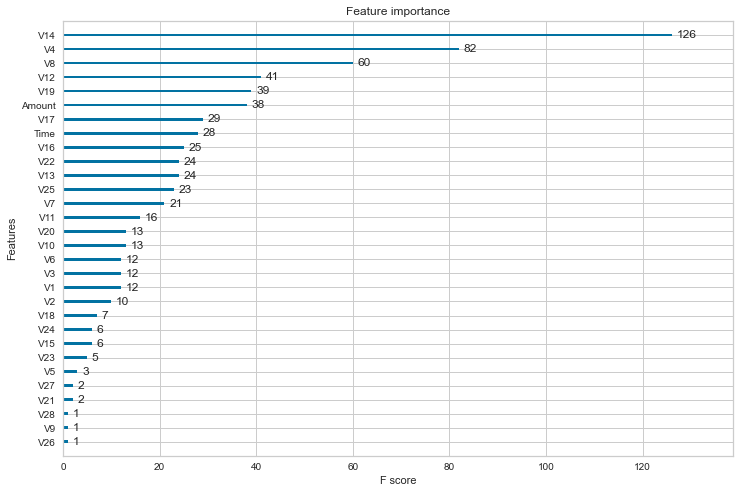

Model                   Description  Accuracy  Precision    Recall  \
1  Xgboost                      early=30  0.999491   0.925926  0.765306   
3  Xgboost  n_estimators=150, imbalanced  0.999508   0.948718  0.755102   
0  Xgboost                       default  0.999508   0.960526  0.744898   
4  Xgboost             undersample, hpo1  0.967382   0.046392  0.918367   
2  Xgboost        default, undersampling  0.957042   0.037052  0.959184   

       F0.5        F1        F2       AUC     AUCPR        Time Taken  \
1  0.888626  0.837989  0.792812  0.972040  0.822719  1.0 min 5.95 sec   
3  0.902439  0.840909  0.787234  0.980479  0.839257  2.0 min 8.88 sec   
0  0.907960  0.839080  0.779915  0.979969  0.836883  2.0 min 6.70 sec   
4  0.057266  0.088322  0.192967  0.985582  0.724557          0.72 sec   
2  0.045872  0.071347  0.160464  0.986483  0.761076          0.40 sec   

   Time Taken Sec  
1       65.950855  
3      128.879098  
0      126.698725  
4        0.724175  
2        0.402027

[[55014  1850]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [17]:
import warnings
warnings.filterwarnings("ignore")

num_eval = 50 # eg 50 number of evaluations
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    # 'n_estimators': scope.int(hp.quniform('n_estimators', 150, 151, 1)),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 0.1),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 0.1),
    # 'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
}



# current parameters
Xtr = df_Xtrain_under
ytr = ser_ytrain_under
Xtx = df_Xtest
ytx = ser_ytest
Xvd = df_Xvalid
yvd = ser_yvalid


# parameters
trials, dict_best_params = hpo_hyperopt(param_hyperopt, 
                                Xtr, ytr,
                                Xvd, yvd, num_eval)

# override best params
# dict_best_params['boosting_type'] = 'gbdt'
time_start = time.time()

# model fit
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150,
                        **dict_best_params)

kw_fit = {}
desc = 'undersample, hpo1'
df_eval,ypreds,yprobs1d = get_row_eval(model,desc,
            df_eval,Xtr,ytr,Xtx,kw_fit=kw_fit)

display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# warning
mywarning = """
WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { boosting_type, num_leaves } might not be used.
"""

# HPO Notes

- [Analytic Vidhya detail hyper parameter description for xgboost](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)


```python
num_eval = 50
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    # 'n_estimators': scope.int(hp.quniform('n_estimators', 150, 151, 1)),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    #'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    #'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}
[[97  2]
 [ 8 90]]
 XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='dart',
              colsample_by_tree=0.425706475356356, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04110731401631858, max_delta_step=0, max_depth=11,
              min_child_weight=10.0, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, num_leaves=46, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.9164366853711832,
              verbosity=1)
              

**Warning** 
with same params but increasing num_eval to 500 gives worse result:
[97  2]
 [10 88]]
```

# HPO for imbalanced data

100%|██████████| 1/1 [00:55<00:00, 55.66s/trial, best loss: -0.9993581165340961]
[20:11:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { colsample_by_tree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



Results
Time taken: 1 min 36 secs
Number of parameter combinations tested:  1
Train Score Best                       : 0.9994 
Test Score                             : 0.9996 
Best parameters:
{   'colsample_by_tree': 0.6667293387868992,
    'learning_rate': 0.02461460213495221,
    'max_depth': 15,
    'min_child_weight': 7.0,
    'subsample': 0.8458141969064651}
XGBClassifier(base_score=None, booster=None,
              colsample_by_tree=0.6667293387868992, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gam

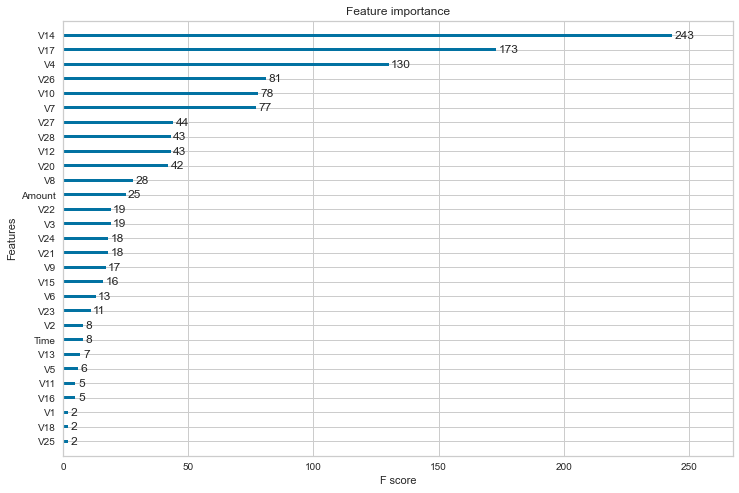

Model                   Description  Accuracy  Precision    Recall  \
1  Xgboost                      early=30  0.999491   0.925926  0.765306   
3  Xgboost  n_estimators=150, imbalanced  0.999508   0.948718  0.755102   
0  Xgboost                       default  0.999508   0.960526  0.744898   
5  Xgboost               imbalanced, hpo  0.999368   0.907895  0.704082   
4  Xgboost             undersample, hpo1  0.967382   0.046392  0.918367   
2  Xgboost        default, undersampling  0.957042   0.037052  0.959184   

       F0.5        F1        F2       AUC     AUCPR         Time Taken  \
1  0.888626  0.837989  0.792812  0.972040  0.822719   1.0 min 5.95 sec   
3  0.902439  0.840909  0.787234  0.980479  0.839257   2.0 min 8.88 sec   
0  0.907960  0.839080  0.779915  0.979969  0.836883   2.0 min 6.70 sec   
5  0.858209  0.793103  0.737179  0.953238  0.797889  1.0 min 19.73 sec   
4  0.057266  0.088322  0.192967  0.985582  0.724557           0.72 sec   
2  0.045872  0.071347  0.160464  0.986483  0.761076           0.40 sec   

   Time Taken Sec  
1       65.950855  
3      128.879098  
0      126.698725  
5       79.731312  
4        0.724175  
2        0.402027

[[56857     7]
 [   29    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.70      0.79        98

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962

CPU times: user 2min 46s, sys: 1.29 s, total: 2min 47s
Wall time: 2min 56s


In [18]:
%%time

num_eval = 1 # make it large, number of evaluations
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 5, 15, 1)),
    # 'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 50)),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.2, 1.0),
    'subsample': hp.uniform ('subsample', 0.7, 1),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
    # regularization
    # 'reg_alpha': hp.uniform('reg_alpha', 0.0, 0.1),
    # 'reg_lambda': hp.uniform('reg_lambda', 0.0, 0.1),
    # 'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    # 'gamma' : hp.uniform ('gamma', 0.1,0.5),
}

# current parameters
Xtr = df_Xtrain
ytr = ser_ytrain
Xtx = df_Xtest
ytx = ser_ytest
Xvd = df_Xvalid
yvd = ser_yvalid

# params
trials, dict_best_params = hpo_hyperopt(param_hyperopt,
                                Xtr, ytr,
                                Xvd, yvd, num_eval)

time_start = time.time()

# model
model = XGBClassifier(n_jobs=-1, random_state=SEED,
                        objective='binary:logistic',
                        n_estimators=150,
                        **dict_best_params)
print(model)
desc = 'imbalanced, hpo'
df_eval,ypreds,yprobs1d = get_row_eval(model,desc,df_eval,Xtr,ytr,Xtx)
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

# HPO Hyper Parameter Optimization with Optuna

In [19]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [20]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING) # use INFO to see progress

In [21]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED,
                      num_eval=1, # make it large
                      n_estimators=10 # make it large
                     )
model.fit(df_Xtrain,ser_ytrain)

ypreds = model.predict(df_Xtest)
vdprobs1d = model.predict_proba(df_Xtest)[:,1] # take second column

auc = roc_auc_score(ser_ytest.to_numpy().ravel(),vdprobs1d)
print(auc)

[20:13:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { num_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9155406060144936


In [22]:
def objective(trial):
    params_xgb_optuna = {
        'eval_metric': 'auc',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1.0),
        'max_depth':trial.suggest_int('max_depth', 5, 20),
        'n_estimators': trial.suggest_int('n_estimators', 150, 1000), 
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
    }

    model = XGBClassifier(random_state=SEED,**params_xgb_optuna)
    model.fit(df_Xtrain,ser_ytrain)

    vdprobs1d = model.predict_proba(df_Xvalid)[:,1]
    score = roc_auc_score(ser_yvalid.to_numpy().ravel(),
                              vdprobs1d)
    return score

In [23]:
# NOTE: there is inherent non-determinism in optuna hyperparameter selection
#       we may not get the same hyperparameters when run twice.


sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage='sqlite:///xgb_optuna_fraud_classifcation.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS)

In [24]:
# Resume hyper parameter from last state

sampler = optuna.samplers.TPESampler(seed=SEED)
N_TRIALS = 1 # make it large

study = optuna.create_study(direction='maximize',
                            sampler=sampler,
                            study_name='xgb_optuna',
                            storage='sqlite:///xgb_optuna_fraud_classifcation.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=N_TRIALS,timeout=600)

In [25]:
print(f'Number of finished trials: {len(study.trials)}')

# best trail
best_trial = study.best_trial

# best params
params_best = study.best_trial.params
params_best

Number of finished trials: 4


{'learning_rate': 0.01567667719550607,
 'max_depth': 16,
 'n_estimators': 662,
 'reg_alpha': 0.034828020870283326,
 'reg_lambda': 0.028770084050677908,
 'subsample': 0.863464954899069}

[[56859     5]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



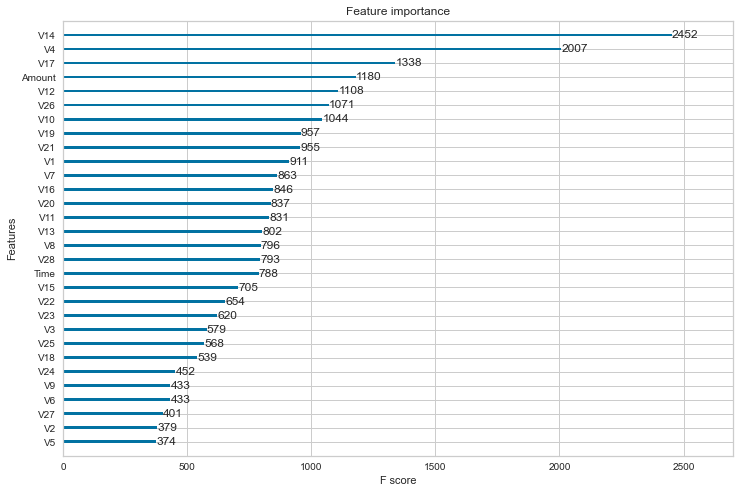

Model                   Description  Accuracy  Precision    Recall  \
1  Xgboost                      early=30  0.999491   0.925926  0.765306   
3  Xgboost  n_estimators=150, imbalanced  0.999508   0.948718  0.755102   
0  Xgboost                       default  0.999508   0.960526  0.744898   
6  Xgboost            grid search optuna  0.999473   0.935897  0.744898   
5  Xgboost               imbalanced, hpo  0.999368   0.907895  0.704082   
4  Xgboost             undersample, hpo1  0.967382   0.046392  0.918367   
2  Xgboost        default, undersampling  0.957042   0.037052  0.959184   

       F0.5        F1        F2       AUC     AUCPR          Time Taken  \
1  0.888626  0.837989  0.792812  0.972040  0.822719    1.0 min 5.95 sec   
3  0.902439  0.840909  0.787234  0.980479  0.839257    2.0 min 8.88 sec   
0  0.907960  0.839080  0.779915  0.979969  0.836883    2.0 min 6.70 sec   
6  0.890244  0.829545  0.776596  0.977421  0.838193  12.0 min 59.63 sec   
5  0.858209  0.793103  0.737179  0.953238  0.797889   1.0 min 19.73 sec   
4  0.057266  0.088322  0.192967  0.985582  0.724557            0.72 sec   
2  0.045872  0.071347  0.160464  0.986483  0.761076            0.40 sec   

   Time Taken Sec  
1       65.950855  
3      128.879098  
0      126.698725  
6      779.632786  
5       79.731312  
4        0.724175  
2        0.402027

[[56859     5]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
# time
time_start = time.time()

model_name = 'xgboost'
desc = 'grid search optuna'

Xtr = df_Xtrain_orig
ytr = ser_ytrain_orig.to_numpy().ravel()
Xtx = df_Xtest
ytx = ser_ytest.to_numpy().ravel()
Xvd = df_Xvalid
yvd = ser_yvalid.to_numpy().ravel()

# use best model
params_best =  study.best_trial.params

model = xgb.XGBClassifier(random_state=SEED)
model.set_params(**params_best)

df_eval,ypreds,yprobs1d = get_row_eval(model,desc,df_eval,Xtr,ytr,Xtx)
display(df_eval)

# confusion matrix
print(confusion_matrix(ytx, ypreds))
print(classification_report(ytx,ypreds))

In [27]:
df_eval.sort_values('Recall',ascending=False).style.background_gradient(subset='Recall')

In [28]:
cm = confusion_matrix(ytest,ypreds)
vals = cm.ravel()
cm

array([[56859,     5],
       [   25,    73]])

In [29]:
print('xgboost Grid Search Results')
print('-'*25)
print('Total Frauds: ', vals[2] + vals[3])
print('Incorrect Frauds: ', vals[2])
print('Incorrect Percent: ', round(vals[2]*100/(vals[2]+vals[3]),2),'%')

xgboost Grid Search Results
-------------------------
Total Frauds:  98
Incorrect Frauds:  25
Incorrect Percent:  25.51 %


In [30]:
from bhishan.bp import plotly_binary_clf_evaluation

yprobs = model.predict_proba(df_Xtest)
yprobs1d = yprobs[:,1] # take only first column

plotly_binary_clf_evaluation('clf_lgb_optuna',model,ytx,ypreds,yprobs1d,df)

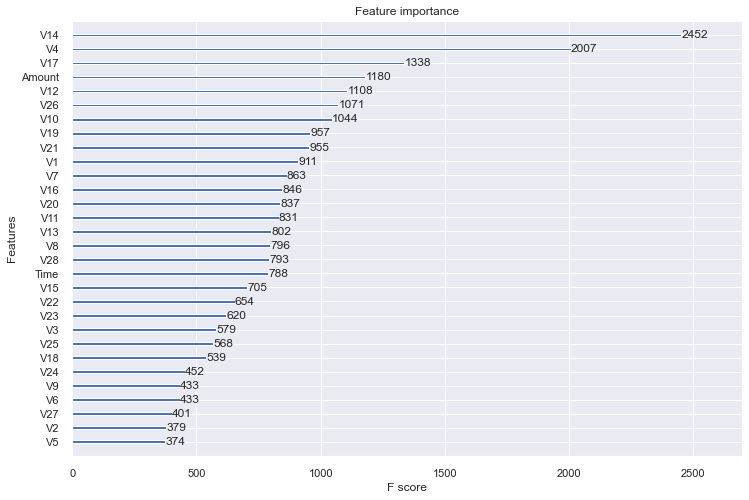

In [31]:
# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model,ax=ax)
plt.show()

# Threshold Optimization

In [32]:
valid_probs = model.predict_proba(df_Xvalid)
yvalid = yvd
valid_probs.shape

(45569, 2)

In [33]:
valid_probs[:5,1], yvalid[:5]

(array([1.7828401e-05, 5.0526865e-05, 2.8985065e-05, 3.3921599e-05,
        2.1999766e-05], dtype=float32),
 array([0, 0, 0, 0, 0]))

In [34]:
%%time

# NOTE: we use probabilities of class 1 column
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
lst_f1 = []
arr_thr = np.linspace(0,1,1000)

for thr in arr_thr:
    valid_preds = (valid_probs[:,1]>thr).astype(int)
    f1 = skmetrics.f1_score(yvalid, valid_preds)
    lst_f1.append(f1)

arr_f1 = np.array(lst_f1)
best_idx = np.argmax(arr_f1)
best_thr = arr_thr[best_idx]
print(f'Best threshold: {best_thr}')

valid_preds = (valid_probs[:,1]> best_thr).astype(int)
f1 = skmetrics.f1_score(yvalid, valid_preds)
precision = skmetrics.precision_score(yvalid, valid_preds)
recall = skmetrics.recall_score(yvalid, valid_preds)

print('Results for Test data')
print('='*40)
print(f'Best threshold F1 : {f1}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Best threshold: 0.11411411411411411
Results for Test data
Best threshold F1 : 1.0
Precision : 1.0
Recall : 1.0
CPU times: user 8.32 s, sys: 81.5 ms, total: 8.41 s
Wall time: 9.2 s


In [35]:
# from validation we get best threshold of 0.114
# let's test that on test data

yprobs = model.predict_proba(df_Xtest)
yprobs[:,1][:5], ytest[:5]

(array([2.4825607e-05, 7.1553783e-05, 1.9891690e-05, 3.1338968e-05,
        5.3795600e-05], dtype=float32),
 array([0, 0, 0, 0, 0]))

In [36]:
ypreds2 = (yprobs[:,1]> best_thr).astype(int)

f1 = skmetrics.f1_score(ytest, ypreds2)
precision = skmetrics.precision_score(ytest, ypreds2)
recall = skmetrics.recall_score(ytest, ypreds2)

print('Results for Test data')
print('='*40)
print(f'Best threshold F1 : {f1}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')

Results for Test data
Best threshold F1 : 0.8461538461538461
Precision : 0.9166666666666666
Recall : 0.7857142857142857


In [37]:
%%time

# For the F1-score, we just did threshold optimization.
# Now, let's try for auc score.
lst_auc = []
arr_thr = np.linspace(0,1,1000)

for thr in arr_thr:
    auc = skmetrics.roc_auc_score(yvalid, valid_probs[:,1])
    lst_auc.append(auc)

arr_auc = np.array(lst_auc)
best_idx = np.argmax(arr_auc)
best_thr = arr_thr[best_idx]
print(f'Best threshold: {best_thr}')


auc = skmetrics.roc_auc_score(yvalid, valid_probs[:,1])
print(f'Best threshold AUC : {auc}')


# WARNING: We can not use 0 as the threshold, so in this case
# we can not use threshold optimization for auc.

Best threshold: 0.0
Best threshold AUC : 1.0
CPU times: user 8.26 s, sys: 45.7 ms, total: 8.31 s
Wall time: 8.34 s


# Model Interpretation

In [38]:
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

## Model interpretation using eli5

In [39]:
import eli5

eli5.show_weights(model)

In [40]:
from eli5.sklearn import PermutationImportance

feature_names = df_Xtrain.columns.tolist()

perm = PermutationImportance(model).fit(df_Xtest, ytx)
eli5.show_weights(perm, feature_names=feature_names)

## Model interpretation using shap

In [41]:
import shap
shap.initjs()

In [42]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01567667719550607, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=662, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.034828020870283326, reg_lambda=0.028770084050677908,
              scale_pos_weight=1, subsample=0.863464954899069,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
params_xgb = dict(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, n_estimators=10,
              n_jobs=1, nthread=-1, num_eval=10, objective='binary:logistic',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=SEED, silent=True, subsample=1)

In [44]:
feature_names = df_Xtrain.columns.tolist()
dtrain = xgb.DMatrix(df_Xtrain, ser_ytrain,feature_names=feature_names)
dvalid = xgb.DMatrix(df_Xvalid, ser_yvalid,feature_names=feature_names)
dtest = xgb.DMatrix(df_Xtest,feature_names=feature_names)
n_rounds = 100

watchlist = [(dtrain, 'dtrain'), (dvalid, 'dvalid')]
booster_model = xgb.train(params_xgb,
                  dtrain,
                  n_rounds,
                  watchlist,
                  verbose_eval=10,
                  early_stopping_rounds=20)

ypreds = booster_model.predict(dtest)

[21:11:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators, num_eval, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	dtrain-error:0.00062	dvalid-error:0.00066
Multiple eval metrics have been passed: 'dvalid-error' will be used for early stopping.

Will train until dvalid-error hasn't improved in 20 rounds.
[10]	dtrain-error:0.00057	dvalid-error:0.00064
[20]	dtrain-error:0.00052	dvalid-error:0.00053
[30]	dtrain-error:0.00042	dvalid-error:0.00046
[40]	dtrain-error:0.00037	dvalid-error:0.00044
[50]	dtrain-error:0.00037	dvalid-error:0.00040
[60]	dtrain-error:0.00035	dvalid-error:0.00042
Stopping. Best iteration:
[43]	dtrain-error:0.00038	dvalid-error:0.00040



In [45]:
# %%time

# explainer = shap.TreeExplainer(booster_model)
# shap_values = explainer.shap_values(dtest)
# # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 341: invalid start byte

In [46]:
booster_model.save_raw()[:100] # we need to remove string "binf"

bytearray(b'binf\x00\x00\x00?\x1e\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')

In [47]:
# https://github.com/slundberg/shap/issues/1215
model_bytearray = booster_model.save_raw()[4:]
booster_model.save_raw = lambda : model_bytearray

In [48]:
explainer = shap.TreeExplainer(booster_model)
shap_values = explainer.shap_values(dtest)

In [49]:
shap_values

array([[ 0.00056228,  0.        ,  0.00184152, ...,  0.00060604,
         0.00153309,  0.01295636],
       [-0.00140535,  0.        ,  0.00184152, ...,  0.00060604,
         0.00148837, -0.01067626],
       [ 0.00056228,  0.        ,  0.00184152, ...,  0.00013744,
         0.00163332, -0.01062816],
       ...,
       [ 0.00056228,  0.        ,  0.00184152, ...,  0.0001527 ,
         0.00163332,  0.01274112],
       [ 0.00056228,  0.        ,  0.00184152, ...,  0.00015313,
         0.00163332, -0.01062816],
       [ 0.00056228,  0.        , -0.00123289, ...,  0.0005284 ,
         0.00147824, -0.01468305]], dtype=float32)

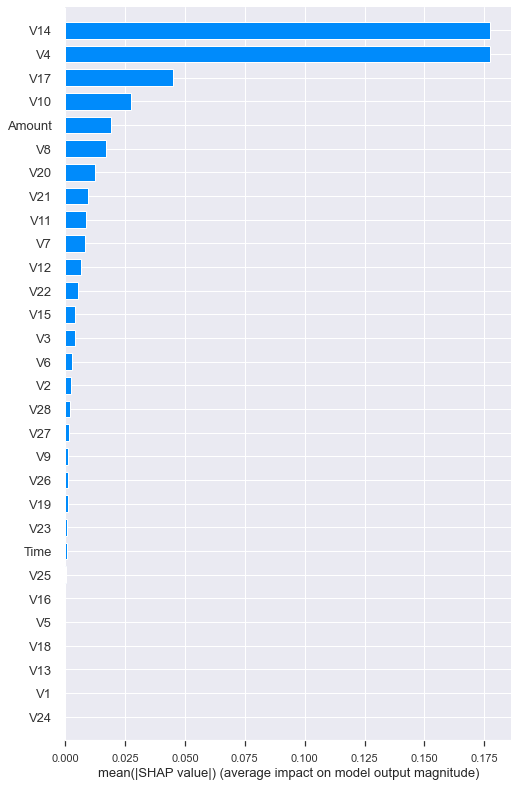

In [50]:
max_display = 30
shap.summary_plot(shap_values, df_Xtest, plot_type="bar",
                  max_display = max_display)

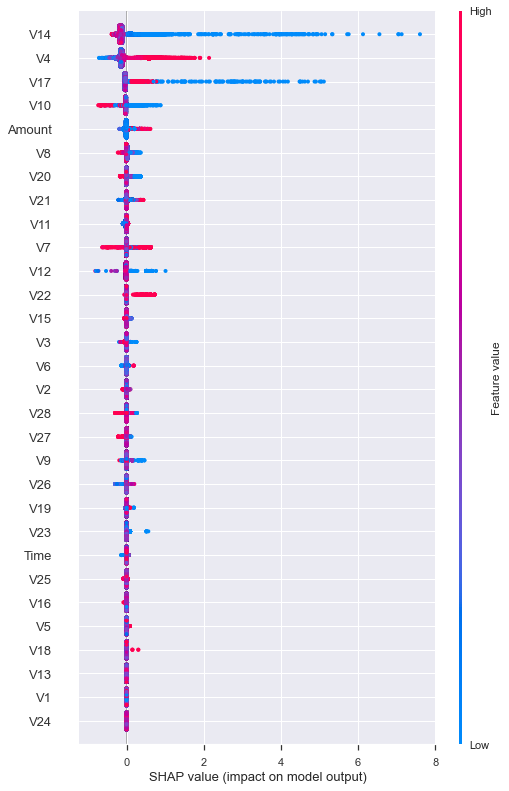

In [51]:
shap.summary_plot(shap_values, df_Xtest, plot_type='dot', max_display = max_display)

In [52]:
# Replicate Shap Importance Chart
import pprint

df_shap = pd.DataFrame(shap_values, columns = df_Xtrain.columns)
df_fimp = df_shap.abs().mean(axis = 0).sort_values(ascending = False)

print(df_fimp.head(max_display))

V14       0.177426
V4        0.177232
V17       0.044867
V10       0.027315
Amount    0.019141
V8        0.016938
V20       0.012650
V21       0.009589
V11       0.008855
V7        0.008476
V12       0.006581
V22       0.005277
V15       0.004186
V3        0.004122
V6        0.002781
V2        0.002555
V28       0.002115
V27       0.001481
V9        0.001234
V26       0.001087
V19       0.001074
V23       0.000836
Time      0.000783
V25       0.000453
V16       0.000107
V5        0.000091
V18       0.000034
V24       0.000000
V1        0.000000
V13       0.000000
dtype: float32


In [53]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

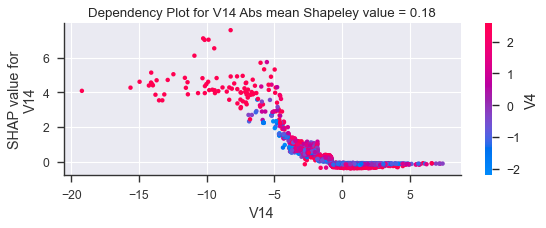

<Figure size 576x396 with 0 Axes>

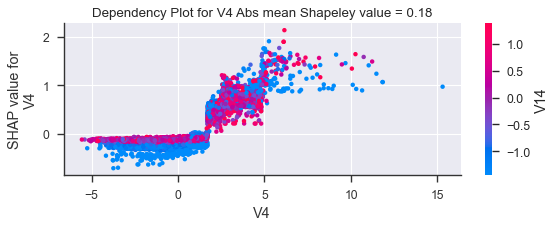

<Figure size 576x396 with 0 Axes>

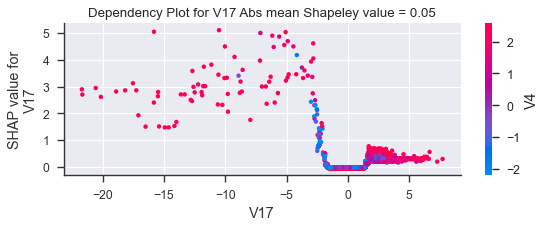

<Figure size 576x396 with 0 Axes>

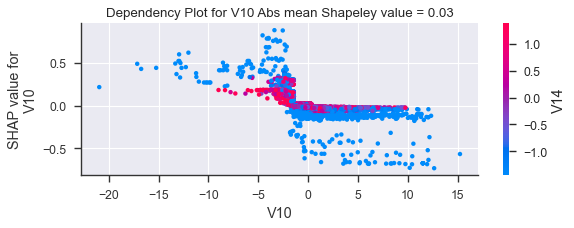

<Figure size 576x396 with 0 Axes>

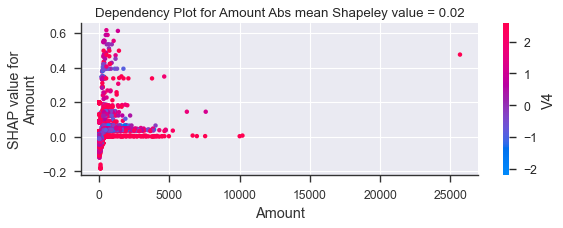

<Figure size 576x396 with 0 Axes>

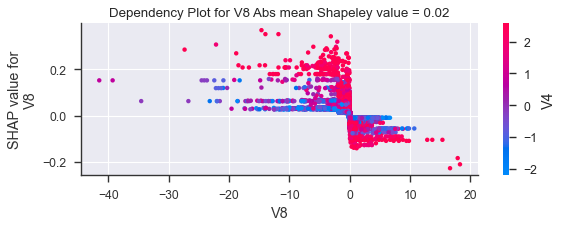

<Figure size 576x396 with 0 Axes>

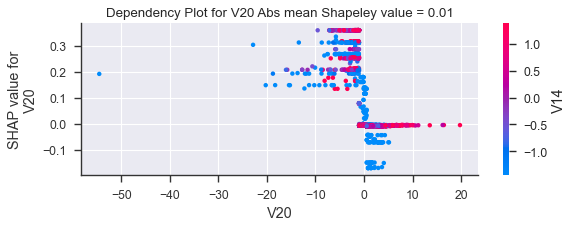

<Figure size 576x396 with 0 Axes>

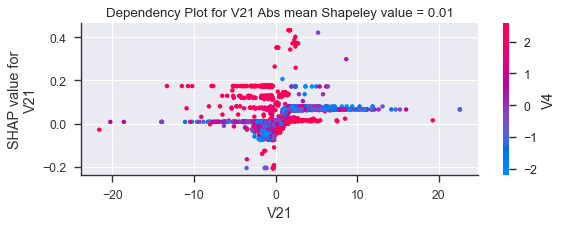

<Figure size 576x396 with 0 Axes>

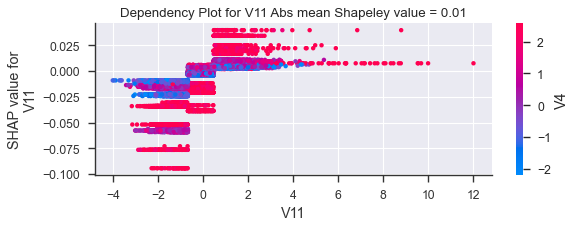

<Figure size 576x396 with 0 Axes>

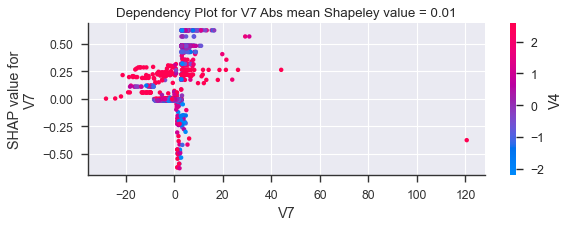

<Figure size 576x396 with 0 Axes>

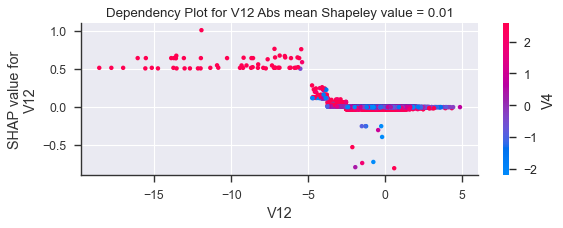

<Figure size 576x396 with 0 Axes>

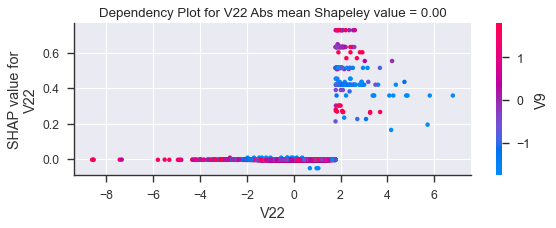

<Figure size 576x396 with 0 Axes>

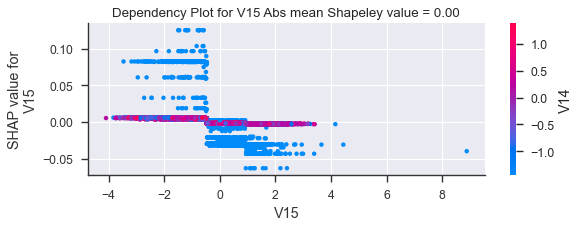

<Figure size 576x396 with 0 Axes>

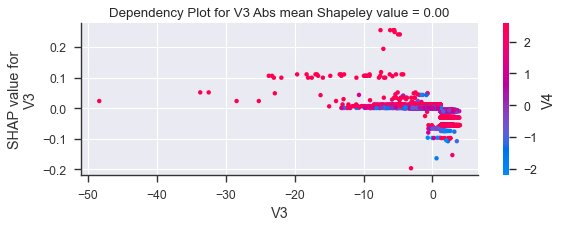

<Figure size 576x396 with 0 Axes>

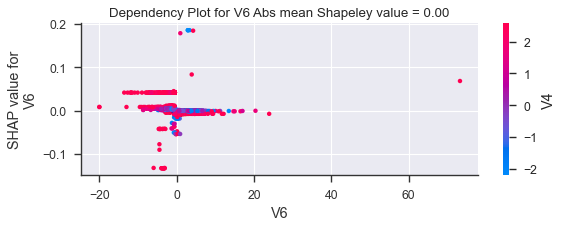

<Figure size 576x396 with 0 Axes>

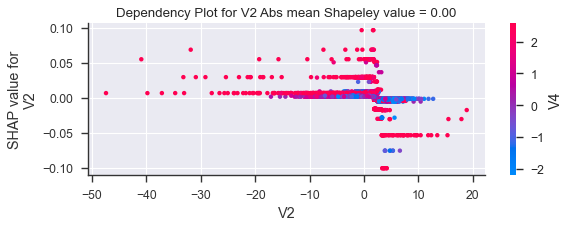

<Figure size 576x396 with 0 Axes>

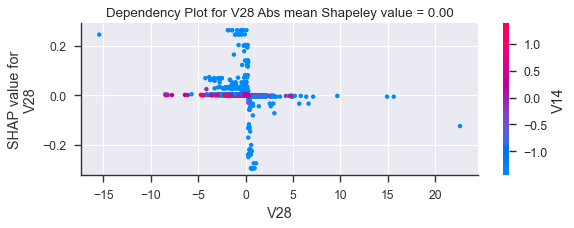

<Figure size 576x396 with 0 Axes>

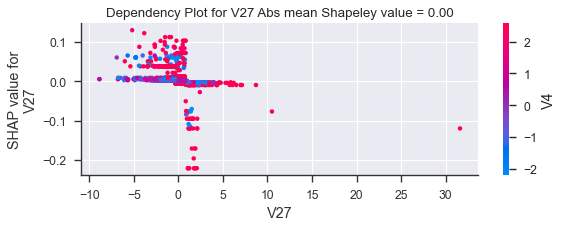

<Figure size 576x396 with 0 Axes>

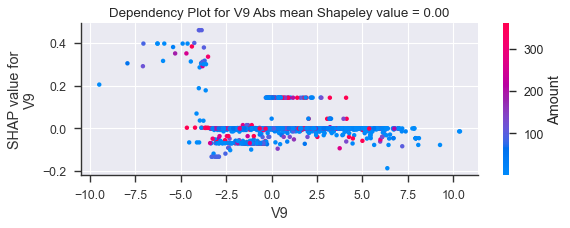

<Figure size 576x396 with 0 Axes>

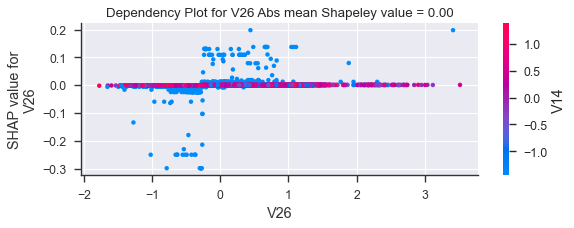

<Figure size 576x396 with 0 Axes>

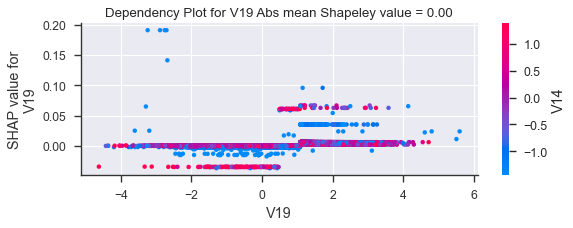

<Figure size 576x396 with 0 Axes>

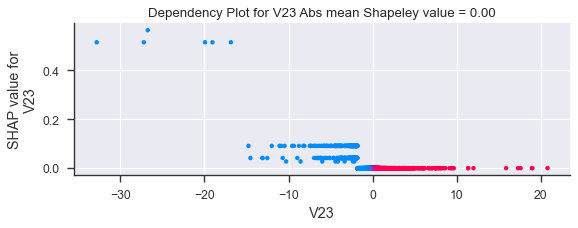

<Figure size 576x396 with 0 Axes>

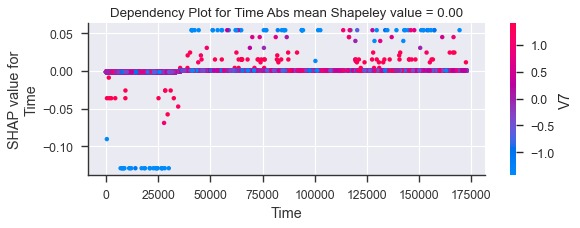

<Figure size 576x396 with 0 Axes>

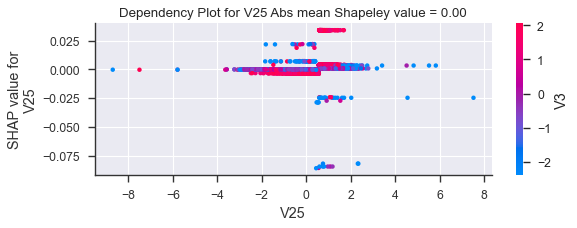

<Figure size 576x396 with 0 Axes>

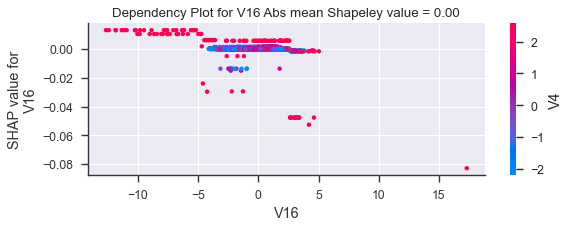

<Figure size 576x396 with 0 Axes>

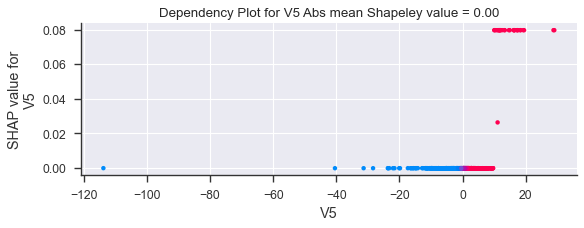

<Figure size 576x396 with 0 Axes>

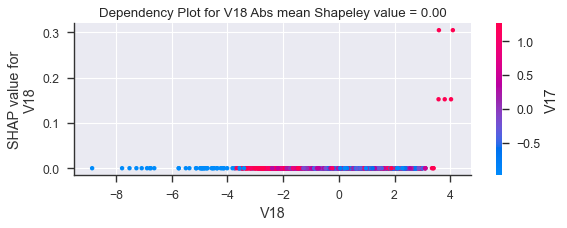

<Figure size 576x396 with 0 Axes>

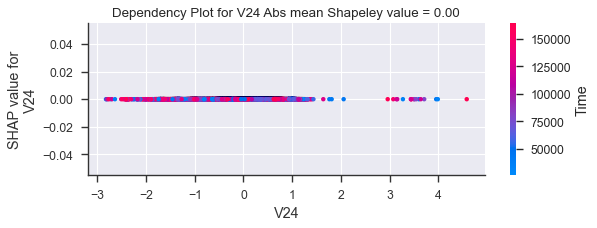

<Figure size 576x396 with 0 Axes>

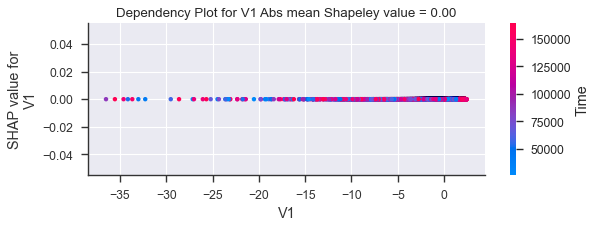

<Figure size 576x396 with 0 Axes>

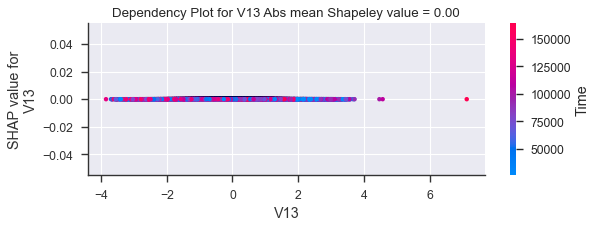

<Figure size 576x396 with 0 Axes>

In [54]:
dict_shap = (df_fimp.round(3).iloc[:max_display].to_dict())

num_subplots = len(dict_shap)
for i,v in enumerate(dict_shap):
    plt.figure(num=None, figsize=(8, 3*num_subplots),
               dpi=80, facecolor='w', edgecolor='k');
    ax1 = plt.subplot(num_subplots,1,i+1);
    
    title = f"Dependency Plot for {v.title()}"
    title += f" Abs mean Shapeley value = {dict_shap[v]:.2f}"
    
    ax1.set_title(title);
    shap.dependence_plot(v, shap_values, df_Xtest, ax = ax1)

    plt.tight_layout()
    plt.show()

In [55]:
N = 10
df_top_ytrain = ser_ytrain.reset_index().sort_values('Class',ascending=False)\
                           .head(N).reset_index(drop=True)
df_top_ytrain

index  Class
0   53591      1
1    9509      1
2  154720      1
3   52584      1
4   14197      1
5   56703      1
6  123301      1
7   16415      1
8    6331      1
9  226814      1

In [56]:
# shap_values[:N]

In [57]:
for i,v in df_top_ytrain.iterrows():
    case, result = v.to_numpy()
    print("CASE {} - Test Fraudulent".format(case))
    
    # plot force plot
    display(shap.force_plot(explainer.expected_value,
                        shap_values[i,:],
                        df_Xtest.iloc[i,:]))

CASE 53591 - Test Fraudulent


CASE 9509 - Test Fraudulent


CASE 154720 - Test Fraudulent


CASE 52584 - Test Fraudulent


CASE 14197 - Test Fraudulent


CASE 56703 - Test Fraudulent


CASE 123301 - Test Fraudulent


CASE 16415 - Test Fraudulent


CASE 6331 - Test Fraudulent


CASE 226814 - Test Fraudulent


# Time taken

In [58]:
notebook_end_time = time.time()
time_taken = time.time() - notebook_start_time
h,m = divmod(time_taken,60*60)
print('Time taken to run whole noteook: {:.0f} hr {:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole noteook: 1 hr 7 min 47 secs
